In [1]:
import pandas as pd
df = pd.read_csv('data/raw.csv')

In [2]:
df

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3975016442355,49696.4,2.432,49696.5,3.518,1707868800000,1707868800005
1,3979416484497,51556.6,4.167,51556.7,2.746,1707935673895,1707935673900
2,3975016442380,49696.4,2.442,49696.5,3.518,1707868800000,1707868800005
3,3979416484502,51556.6,4.157,51556.7,2.746,1707935673895,1707935673900
4,3975016442386,49696.4,2.452,49696.5,3.518,1707868800000,1707868800005
...,...,...,...,...,...,...,...
45267795,3979416484468,51556.6,4.202,51556.7,2.746,1707935673895,1707935673900
45267796,3979416484469,51556.6,4.192,51556.7,2.746,1707935673895,1707935673900
45267797,3979416484473,51556.6,4.182,51556.7,2.746,1707935673895,1707935673900
45267798,3979416484474,51556.6,4.172,51556.7,2.746,1707935673895,1707935673900


In [3]:
# ensuring chronological order based on event time
df = df.sort_values('event_time').reset_index(drop=True)

In [4]:
# calculating the average of ask price and bid price
df['mid'] = (df['best_ask_price'] + df['best_bid_price'])/2

In [5]:
# computing the imbalance
df['imbalance'] = (df['best_bid_qty'] - df['best_ask_qty'])/(df['best_ask_qty'] + df['best_bid_qty'])

In [6]:
df['imbalance'].describe()

count    4.526780e+07
mean     1.954677e-02
std      6.697994e-01
min     -9.999880e-01
25%     -5.948514e-01
50%      2.008032e-02
75%      6.514573e-01
max      9.999972e-01
Name: imbalance, dtype: float64

(array([7398964., 3823916., 3658887., 3696853., 3658663., 3589989.,
        3544794., 3603099., 4037117., 8255518.]),
 array([-9.99988023e-01, -7.99989504e-01, -5.99990985e-01, -3.99992466e-01,
        -1.99993947e-01,  4.57233504e-06,  2.00003091e-01,  4.00001611e-01,
         6.00000130e-01,  7.99998649e-01,  9.99997168e-01]),
 <BarContainer object of 10 artists>)

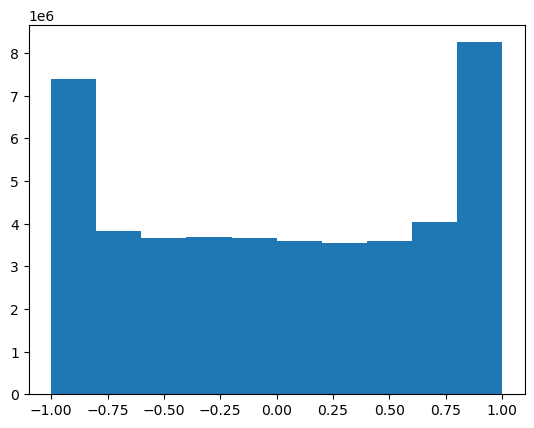

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['imbalance'])

In [8]:
df['spread'] = df['best_ask_price'] - df['best_bid_price']
df['spread'].describe()

count    4.526780e+07
mean     1.154589e-01
std      4.962533e-01
min      1.000000e-02
25%      1.000000e-01
50%      1.000000e-01
75%      1.000000e-01
max      2.357000e+02
Name: spread, dtype: float64

In [9]:
# removing extreme spread observations beyond 99.9 percentile
threshold = df['spread'].quantile(0.999)
df = df[df['spread'] <= threshold]

In [10]:
df.isna().sum()

update_id           0
best_bid_price      0
best_bid_qty        0
best_ask_price      0
best_ask_qty        0
transaction_time    0
event_time          0
mid                 0
imbalance           0
spread              0
dtype: int64

In [11]:
k = 20              # chosen horizon
df['future_mid'] = df['mid'].shift(-k)

In [12]:
df['up'] = (df['future_mid'] > df['mid']).astype(int)

In [17]:
df.to_csv('data/processed.csv')

In [14]:
sample_data = df.iloc[:10,:]

In [16]:
sample_data.to_csv('data/sample_data.csv')